In [45]:
import pandas as pd
import pm4py

log_csv = pd.read_csv('https://raw.githubusercontent.com/paoloceravolo/BIS2022/main/Event%20Logs/CallCenterLog.csv',sep=',')

# convert the date colument to date format
log_csv['Start Date'] = pd.to_datetime(log_csv['Start Date'])
log_csv['End Date'] = pd.to_datetime(log_csv['End Date'])

# format datafram for PM4PYT
log_csv = pm4py.format_dataframe(log_csv, case_id='Case ID', activity_key='Activity', start_timestamp_key='Start Date', timestamp_key='End Date')

event_log = pm4py.objects.conversion.log.converter.apply(log_csv)
log_csv

C:\Users\pietro\AppData\Local\Temp\ipykernel_25956\258932880.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  log_csv['Start Date'] = pd.to_datetime(log_csv['Start Date'])
C:\Users\pietro\AppData\Local\Temp\ipykernel_25956\258932880.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  log_csv['End Date'] = pd.to_datetime(log_csv['End Date'])


,Case ID,Activity,Start Date,End Date,Agent Position,Customer ID,Topic,Service Type,Resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,start_timestamp
0,Case 1,Inbound Call,2010-09-03 08:05:00+00:00,2010-09-03 08:10:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Inbound Call,2010-09-03 08:10:00+00:00,0,0,2010-09-03 08:05:00+00:00
1,Case 1,Handle Case,2010-11-03 10:30:00+00:00,2010-11-03 10:32:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Helen,Case 1,Handle Case,2010-11-03 10:32:00+00:00,1,0,2010-11-03 10:30:00+00:00
2,Case 1,Call Outbound,2010-11-03 11:45:00+00:00,2010-11-03 11:52:00+00:00,FL,Customer 1,Reservations Pro,Referred to Servicer,Henk,Case 1,Call Outbound,2010-11-03 11:52:00+00:00,2,0,2010-11-03 11:45:00+00:00
3,Case 10,Handle Email,2010-03-27 11:29:00+00:00,2010-03-27 11:30:00+00:00,FL,Customer 10,Queries,Product Assistance,Jochem,Case 10,Handle Email,2010-03-27 11:30:00+00:00,3,1,2010-03-27 11:29:00+00:00
4,Case 100,Inbound Call,2010-03-21 11:25:00+00:00,2010-03-21 11:26:00+00:00,FL,Customer 3,Queries,Product Assistance,Karen,Case 100,Inbound Call,2010-03-21 11:26:00+00:00,4,2,2010-03-21 11:25:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,Case 996,Inbound Call,2010-06-03 11:17:00+00:00,2010-06-03 11:19:00+00:00,FL,Customer 834,Reservations Pro,Referred to Servicer,Wil,Case 996,Inbound Call,2010-06-03 11:19:00+00:00,7543,3881,2010-06-03 11:17:00+00:00
7544,Case 997,Inbound Call,2010-03-25 08:15:00+00:00,2010-03-25 08:23:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Richard,Case 997,Inbound Call,2010-03-25 08:23:00+00:00,7544,3882,2010-03-25 08:15:00+00:00
7545,Case 997,Inbound Call,2010-03-25 16:26:00+00:00,2010-03-25 16:29:00+00:00,FL,Customer 835,Queries,Referred to Servicer,Ton,Case 997,Inbound Call,2010-03-25 16:29:00+00:00,7545,3882,2010-03-25 16:26:00+00:00
7546,Case 998,Inbound Call,2010-03-29 15:53:00+00:00,2010-03-29 15:57:00+00:00,FL,Customer 3,Queries,Product Assistance,Clark,Case 998,Inbound Call,2010-03-29 15:57:00+00:00,7546,3883,2010-03-29 15:53:00+00:00


Mean duration 0 days 13:21:38.131274131
Median duration 0 days 00:04:00
Mode duration 60000000000 nanoseconds
STDev duration 25 days 06:52:44.177454319


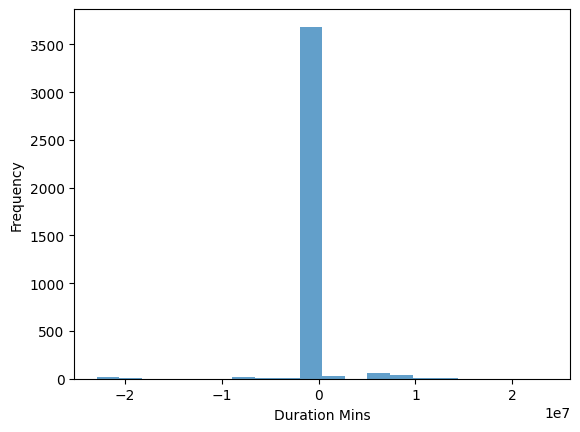

In [41]:
def compute_case_duration(df):
    df ['Duration'] = df['End Date'] -  df['Start Date']
    
    case_durations = df.groupby('Case ID')['Duration'].sum()
    
    return case_durations;

case_dur = compute_case_duration(log_csv)
print('Mean duration', case_dur.mean())
print('Median duration', case_dur.median())
print('Mode duration', case_dur.mode().values[0])
print('STDev duration', case_dur.std())

import matplotlib.pyplot as plt
# va convertito...
case_dur = case_dur.dt.total_seconds().astype(int)
plt.hist(case_dur, bins=20, alpha=0.7)
plt.xlabel('Duration Mins')
plt.ylabel('Frequency')
plt.show()

In [43]:
petri_net = pm4py.discovery.discover_petri_net_alpha(event_log, activity_key='Activity');
case_duration = pm4py.stats.get_case_duration(event_log, case_id='Case 1',activity_key='Activity')
cycle_time = pm4py.get_cycle_time(event_log, activity_key='Activity')
cycle_time

7432.725868725869

In [22]:
filtered_log = pm4py.algo.filtering.log.cases.case_filter.filter_case_performance(event_log, 60, 7*864000)

print('prima:', len(event_log))
print('dopo:', len(filtered_log))

variants = pm4py.algo.filtering.log.variants.variants_filter.get_variants(filtered_log)

print('varianti:', variants)

prima: 3885
dopo: 1063
varianti: {('Inbound Call', 'Handle Case', 'Call Outbound'): [{'attributes': {'concept:name': 'Case 1'}, 'events': [{'Case ID': 'Case 1', 'Activity': 'Inbound Call', 'Start Date': Timestamp('2010-09-03 08:05:00+0000', tz='UTC'), 'End Date': Timestamp('2010-09-03 08:10:00+0000', tz='UTC'), 'Agent Position': 'FL', 'Customer ID': 'Customer 1', 'Topic': 'Reservations Pro', 'Service Type': 'Referred to Servicer', 'Resource': 'Helen', 'concept:name': 'Inbound Call', 'time:timestamp': Timestamp('2010-09-03 08:10:00+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'Case ID': 'Case 1', 'Activity': 'Call Outbound', 'Start Date': Timestamp('2010-11-03 11:45:00+0000', tz='UTC'), 'End Date': Timestamp('2010-11-03 11:52:00+0000', tz='UTC'), 'Agent Position': 'FL', 'Customer ID': 'Customer 1', 'Topic': 'Reservations Pro', 'Service Type': 'Referred to Servicer', 'Resource': 'Henk', 'concept:name': 'Call Outbound', 'time:timestamp': Timestamp('2010-11-03 11:52:00+0000',

In [27]:

data_log =  pm4py.objects.conversion.log.converter.apply(filtered_log, variant= pm4py.objects.conversion.log.converter.Variants.TO_DATA_FRAME)

profile = data_log.groupby('Case ID').agg(
Activity = ('Activity', 'count'),\
Activity_list = ('Activity', lambda x: ','.join(x) ),\
Rosource = ('Resource', 'nunique'),\
Duration = ('Start Date', lambda x: x.max()- x.min()),\
)

profile

mean_duration = profile[(profile['Duration'] > '0:0:0')].agg('mean')

mean_duration

,Activity,Activity_list,Rosource,Duration
Case ID,,,,
Case 1,3,"Inbound Call,Handle Case,Call Outbound",2,61 days 03:40:00
Case 1000,3,"Inbound Call,Handle Case,Handle Case",1,0 days 00:04:00
Case 1002,2,"Inbound Call,Call Outbound",1,30 days 21:03:00
Case 1003,4,"Inbound Email,Call Outbound,Email Outbound,Han...",1,61 days 04:23:00
Case 1004,6,"Inbound Email,Call Outbound,Inbound Email,Hand...",1,1 days 13:04:00
...,...,...,...,...
Case 986,3,"Inbound Email,Handle Case,Email Outbound",1,84 days 02:30:00
Case 987,5,"Inbound Call,Handle Case,Call Outbound,Inbound...",4,41 days 21:49:00
Case 989,4,"Inbound Email,Handle Email,Inbound Email,Handl...",1,0 days 16:54:00
